# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

At the end of the experiment, you will be able to :

* Classify fruits data using KNN

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "Demo_KNN_Scaling" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing the required packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def labels_converter(s):
    s = s.lower()
    if s == "orange":
        return 0
    if s == "apple":
        return 1
    return -1

#### Loading the data

In [ ]:
data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter})

In [ ]:
data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
1,Orange,320,1.00,0
2,Orange,310,0.95,0
3,Red,220,0.45,1
4,Red,230,0.50,1


In [ ]:
train = data[0:60:3] # Considering only 20 samples for Train Set
train.head(20)

,Color,Weight,Sphericity,labels
0,Red,200,0.400,1
3,Red,220,0.450,1
6,Red,240,0.350,1
9,Red,243,0.530,1
12,Green,259,0.420,1
15,Greenish yellow,260,0.750,0
18,Green,266,0.680,0
21,Green,220,0.330,1
24,Red,210,0.390,1
27,Reddish yellow,270,0.333,1


#### Checking for length of the dataset

In [ ]:
print(len(data))
print(len(train))
print(type(train))

69
20
<class 'pandas.core.frame.DataFrame'>


In [ ]:
test = data[1:50:10] # Considering 5 samples for testing
test

,Color,Weight,Sphericity,labels
1,Orange,320,1.00,0
11,Green,255,0.60,1
21,Green,220,0.33,1
31,Green,255,0.69,0
41,Red,200,0.48,1


In [ ]:
print(len(test))

5


### Applying KNN Classifier on the data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [ ]:
traindata = train.values[:,1:3] # Converting dataframe to array
#(train.values[:,1:3])
testdata = test.values[:,1:3] # Converting dataframe to array
print(test.values[:,1:3])

[[320 1.0]
 [255 0.6]
 [220 0.33]
 [255 0.69]
 [200 0.48]]


In [ ]:
# Training or fitting the model with the train data
neigh.fit(traindata,train.labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Testing the trained model
predictions = neigh.predict(testdata)


In [ ]:
print(predictions,"predictions") #Predictions
print(test.values[:,3],"labels") #labels

[0 1 1 1 1] predictions
[0 1 1 0 1] labels


### Plotting The train and test points before scaling

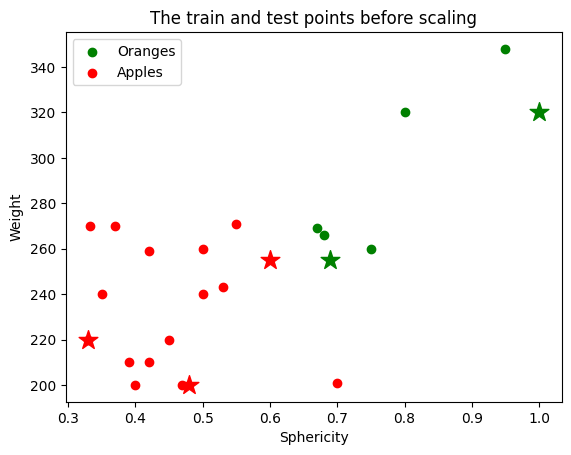

In [ ]:
plt.style.use('default')

oranges = train[train.labels == 0]
apples = train[train.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") # Training data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o") # Training data

oranges = test[test.labels == 0]  
apples = test[test.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200) # Testing data
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200) #Testing data

plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points before scaling")
plt.show()

In [ ]:
import numpy as np
predicted_data = np.column_stack((testdata,predictions.T))
print(predicted_data)

[[320 1.0 0]
 [255 0.6 1]
 [220 0.33 1]
 [255 0.69 1]
 [200 0.48 1]]


### Plotting The Predictions Before Scaling

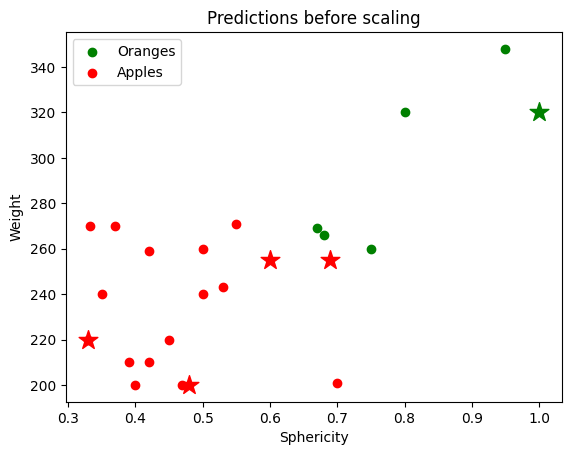

In [ ]:
plt.style.use('default')

oranges = train[train.labels == 0]
apples = train[train.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o")
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")

oranges1 = predicted_data[predicted_data[:,2]==0]
apples1 = predicted_data[predicted_data[:,2]==1]
plt.scatter(oranges1[:,1], oranges1[:,0], color="green",marker="*",s=200)
plt.scatter(apples1[:,1], apples1[:,0], color="red",marker="*",s=200)

plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.legend(["Oranges","Apples"])
plt.title("Predictions before scaling")
plt.show()

## Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Data Before Scaling
data.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,1
1,Orange,320,1.00,0
2,Orange,310,0.95,0
3,Red,220,0.45,1
4,Red,230,0.50,1


In [ ]:
data[['Sphericity', 'Weight']] = scaler.fit_transform(data[['Sphericity', 'Weight']])

In [ ]:
#Data After Scaling 
data.head()

,Color,Weight,Sphericity,labels
0,Red,0.000000,0.333333,1
1,Orange,0.774194,1.000000,0
2,Orange,0.709677,0.944444,0
3,Red,0.129032,0.388889,1
4,Red,0.193548,0.444444,1


### Taking the data samples for training after the interval of  3

In [ ]:
train = data[0:60:3]
train.head()

,Color,Weight,Sphericity,labels
0,Red,0.000000,0.333333,1
3,Red,0.129032,0.388889,1
6,Red,0.258065,0.277778,1
9,Red,0.277419,0.477778,1
12,Green,0.380645,0.355556,1


In [ ]:
print(len(train))

20


In [ ]:
#test = data.iloc[[5,15,31,49,57]]
test = data[1:50:10]
test

,Color,Weight,Sphericity,labels
1,Orange,0.774194,1.000000,0
11,Green,0.354839,0.555556,1
21,Green,0.129032,0.255556,1
31,Green,0.354839,0.655556,0
41,Red,0.000000,0.422222,1


In [ ]:
print(len(test))

5


#### Apply KNN Classifier on the data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k,metric="euclidean", algorithm="brute")

In [ ]:
traindata = train.values[:,1:3] # Converting dataframe into array
testdata = test.values[:,1:3] # Converting dataframe into array

In [ ]:
# Training or fitting the model with the train data
neigh.fit(traindata,train.labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Testing the trained model
scaled_predictions = neigh.predict(testdata)

In [ ]:
print(scaled_predictions,"predictions") #Predictions
print(test.values[:,3],"labels") #labels

[0 1 1 0 1] predictions
[0 1 1 0 1] labels


### Plotting the train and test points after scaling

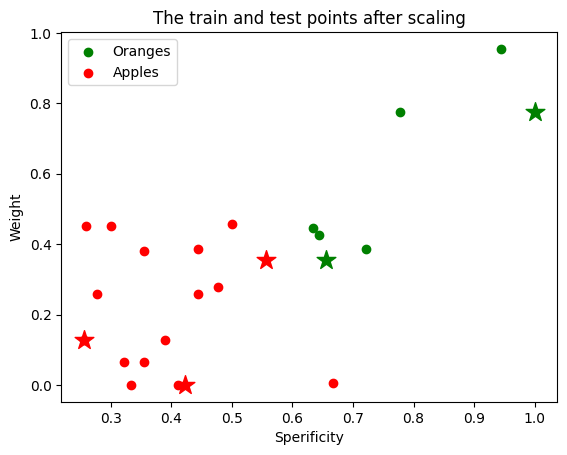

In [ ]:
plt.style.use('default')

oranges = train[train.labels == 0]
apples = train[train.labels == 1]
# Plotting Training data
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o") 
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")

oranges = test[test.labels == 0]
apples = test[test.labels == 1]
# Plotting Testing data
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="*",s=200)
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="*",s=200)

plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges", "Apples"])
plt.title("The train and test points after scaling")
plt.show()

In [ ]:
predicted_data = np.column_stack((testdata,scaled_predictions.T))
print(predicted_data)

[[0.7741935483870968 1.0 0]
 [0.3548387096774195 0.5555555555555555 1]
 [0.12903225806451624 0.2555555555555556 1]
 [0.3548387096774195 0.6555555555555554 0]
 [0.0 0.4222222222222222 1]]


### Plotting the Predictions after scaling

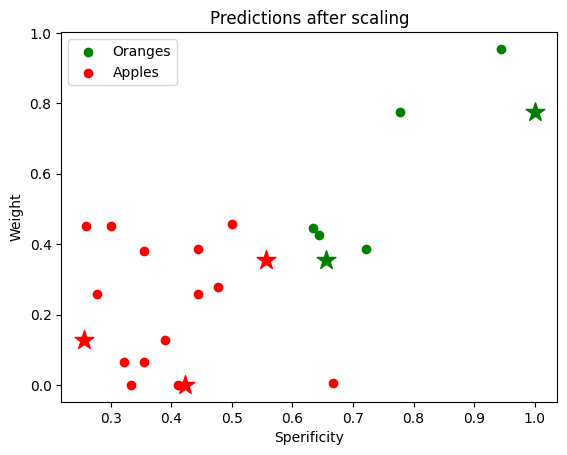

In [ ]:
plt.style.use('default')

oranges = train[train.labels == 0]
apples = train[train.labels == 1]
plt.scatter(oranges.Sphericity, oranges.Weight,color="green",marker="o")
plt.scatter(apples.Sphericity, apples.Weight,color="red",marker="o")

oranges1 = predicted_data[predicted_data[:,2]==0]
apples1 = predicted_data[predicted_data[:,2]==1]
plt.scatter(oranges1[:,1], oranges1[:,0], color="green",marker="*",s=200)
plt.scatter(apples1[:,1], apples1[:,0], color="red",marker="*",s=200)


plt.xlabel("Sperificity")
plt.ylabel("Weight")
plt.legend(["Oranges","Apples"])
plt.title("Predictions after scaling")
plt.show()

##  Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "More explanation on details how algorithm works" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2855
Date of submission:  12 Sep 2020
Time of submission:  14:36:05
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
